David Felipe Mora
# Parse Homework

## **1. Gramatica para el Español**

Los simbolos no terminales son:

- O = Oración 
- SU = Sujeto
- P = Predicado
- FP = Frase preposicional
- D = Determinante
- S = Sustantivo
- PN = Pronombre
- V = Verbo

La gramatica es la siguiente:

- O $\to$ SU P
- SU $\to$ D S | D S FP | "Yo"
- P $\to$ V SU | P FP
- FP $\to$ P SU
- D $\to$ "un" | "mi"
- S $\to$ "casa" | "habitación"
- V $\to$ "veo" | "leo"
- P $\to$ "en"

Esta gramatica es ambigüa, en efecto: considere la cadena:
> Yo leo un libro en mi casa

Veamos que esta tiene dos arboles sintacticos bajo la gramatica definida anteriormente.

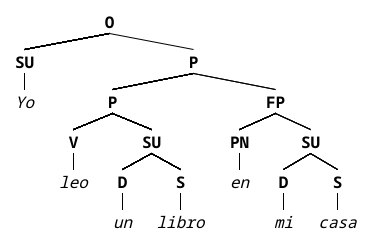

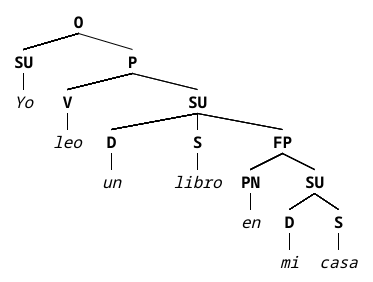

Por lo tanto, y como la gramatica es ambigüa, esta no es LL(1) ni LR(1).

## **2. Considere la gramatica**

### 1. ¿Es LL(1)?

La gramatica es ambigüa, entonces no es LL(1). Considere la siguiente cadena:
> if integer then if integer then print(id) else print(integer)

Esta tiene dos arboles sintacticos diferentes:

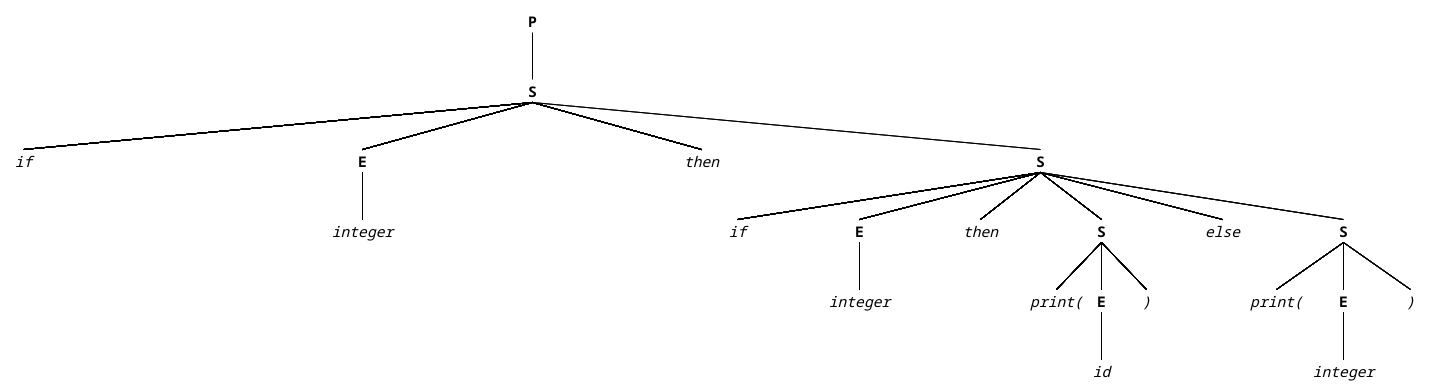

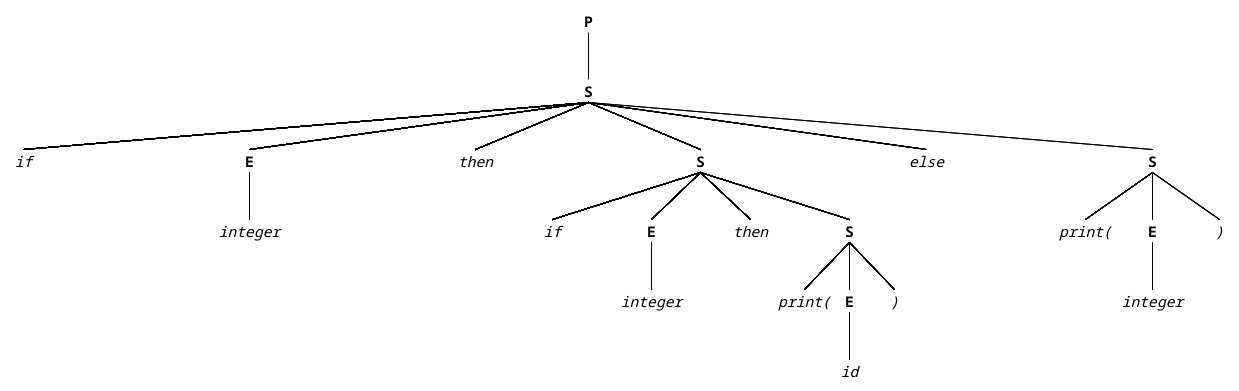

### 2. Gramatica equivalente

Eliminamos la recursión a izquierda de la producción:

$E \to E + E$

Remplazando la producciones e introduccion una nueva:

$E \to \texttt{id }E^* | \texttt{integer }E^*$

$E^* \to \epsilon | +E$

De igual forma eliminamos los prefijos comunes a la izquierda de las siguientes producciones:

$P \to S | SP$

$S \to \texttt{if } E \texttt{ then } S | \texttt{if } E \texttt{ then } S \texttt{ else } S$

Modificando las producciones las misma y añadiendo unas nuevas:

$S \to \texttt{if } E \texttt{ then } S \text{ }S^*$

$S^* \to \epsilon | \texttt{else } S $

$P \to S P^*$

$P^* \to \epsilon | P$

El resto de las producciones se quedan igual.

### 3. First y Follows

Conjuntos First:

$First(E) = \{\texttt{id}, \texttt{integer}\}$

$First(E^*) = \{\epsilon, +\}$

$First(S) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}\}$

$First(S^*) = \{\epsilon, \texttt{else} \}$

$First(P) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}\}$

$First(P^*) = \{\epsilon, \texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}\}$

---

Conjuntos Follow:

$Follow(E) = \{\texttt{then}, \texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, +, \$ \}$

$Follow(E^*) = \{\texttt{then}, \texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, +, \$ \}$

$Follow(S) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}, \texttt{end}, \$ \}$

$Follow(S^*) = \{\texttt{if}, \texttt{while}, \texttt{begin}, \texttt{print}, \texttt{id}, \texttt{integer}, \texttt{end}, \$ \}$

$Follow(P) = \{ \texttt{end}, \$ \}$

$Follow(P^*) = \{ \texttt{end}, \$ \}$

## **3. Gramatica LR**

Dibujo del automata LR(0)

![img](g3/grammar3.png)

## 4. **Gramatica JSON**

La gramatica del lenguaje JSON es:

- $J \to \{ E \}$
- $E \to E, E $ 
- $E \to "K": V$
- $K \to nombre | id$
- $V \to vanessa | claudio | 7894 | 2134$

_**Conjuntos First**_:

$First(J) = \{ \{ \}$

$First(E) = \{ " \}$

$First(K) = \{ nombre, id \}$

$First(V) = \{ vanessa, caludio, 7894, 2134 \}$


_**Conjuntos Follow**_:

$Follow(J) = \{ \$ \}$

$Follow(E) = \{ \} \}$

$Follow(K) = \{ " \}$

$Follow(J) = \{ ,\} \}$

La gramatica no es LL(1) ya que tiene recursión a izquierda en la regla 2. Por otro lado, es LR(1) ya que podemos derivar cualquier cadena, con el metodo shift-reduce

| Stack         | Input                             | Action              |
| ------------- | --------------------------------- | ------------------- |
|               | {"nombre": claudio, "id" :2134}\$ | shift               |
| {             | "nombre": claudio, "id" :2134}\$  | shift               |
| {"            | nombre": claudio, "id" :2134}\$   | shift               |
| {"nombre      | ": claudio, "id" :2134}\$         | reduce K->nombre    |
| {"k           | ": claudio, "id" :2134}\$         | shift, shift, shift |
| {"k":claudio  | "pd":2134} \$                     | reduce v->claudio   |
| {"k":v        | "id":2134} \$                     | reduce E->"k":v     |
| {E            | "id":2134} \$                     | shift               |
| {E, "id       | ":2134} \$                        | reduce k-> id       |
| {E, "k        | ":2134} \$                        | shift, shift, shift |
| {E, "k", 2134 | } \$                              | reduce v->2134      |
| {E, "k", v    | } \$                              | reduce E->"k";v     |
| {E, E,        | } \$                              | reduce E->E, E      |
| {E            | } \$                              | shift               |
| {E}           | \$                                | reduce J-> {E}      |
| J             | \$                                | accept              |


## **Documentación BISON**

En este [link](https://www.gnu.org/software/bison/manual/html_node/Xml.html) de la documentación de Bison explican como se puede generar el grafo de una gramatica de forma automatica.

Para ello primero debemos especifica la gramatica en un archivo .y segun las especificaciones de bison, por ejemplo para el ejercicio 2, nuestro archivo `grammar.y` se ve la siguiente forma.

```
%%
S: "id" "=" E;
E: E "+" P | P;
P: "id" | "(" E ")" | "id" "(" E ")";
```

Despues guardamos el archivo y ejecutamos los siguientes comandos en la terminal:

```bash
bison --graph grammar.y
```

De donde obtenemos un archivo .c y un archivo graphviz .gv que podemos convertir a formato de imagen con el 
siguiente comando:

```bash
dot grammar.gv -Tpng >> grammar.png
```


Entonces las gramaticas de los puntos dos y tres son respectivamente:

![img](g2/grammar2.png)

![img](g3/grammar3.png)